<a href="https://colab.research.google.com/github/kpatwa153/gis/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cool, i love cdc brfss!

others oftentimes aggregate their data to counties for easy to use dataset eg:

https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation


can map other stuff like fast foods; why railway would be related to obesity? maybe like car use, walkability etc

In [2]:
#Importing necessary libraries
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:

#! pip install geopandas
!pip install mapclassify
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.3 MB/s eta 0:00:00


## My Area of Interest
The dataset provides the percentage of Obesity across USA state wise. The data is obtained from the 2015 CDC BRFSS Survey. Reason behind the Obesity can later be found out by connecting it with data related to Walkability per state and the population density.

The data is present at data.gov site. Here is the link to view it online: https://catalog.data.gov/dataset/national-obesity-by-state-d765a

Link to download the file: https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.zip?outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D

The obesity dataset is further compared with the population density dataset

Population Density Dataset link: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

Link to Dowload the dataset: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

## **PS0 Assignment**

In [4]:
#importing the data
! wget -q -O us_map.zip https://drive.google.com/uc?id=1hFpTOmjP-Ti7JAEZfD0V3mRtF5siqS5Q&export=download

zip_ref = zipfile.ZipFile('us_map.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


In [5]:
#Reading the shapefile data under obs object
obs=gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

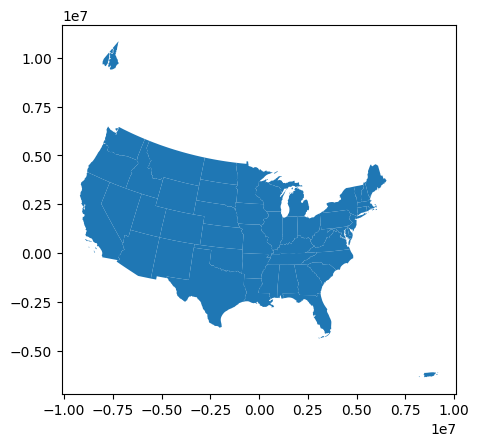

In [6]:
#make the map
obs.plot()

In [ ]:
#Finding the data type of all the columns of the dataset
obs.dtypes

FID              int64
NAME            object
Obesity        float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

# Exploratory Data Analysis

In [7]:
#Using the describe function
obs.describe()

,FID,Obesity,SHAPE_Leng,SHAPE_Area
count,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,26.500000,29.286538,6.294282e+06,1.724137e+12
std,15.154757,3.832832,3.068681e+06,1.455130e+12
min,1.000000,20.200000,0.000000e+00,0.000000e+00
25%,13.750000,26.250000,5.022132e+06,8.299946e+11
50%,26.500000,29.800000,6.445438e+06,1.492228e+12
75%,39.250000,31.475000,7.747383e+06,2.245753e+12
max,52.000000,36.200000,1.540832e+07,7.672329e+12


<Axes: >

[]

[]

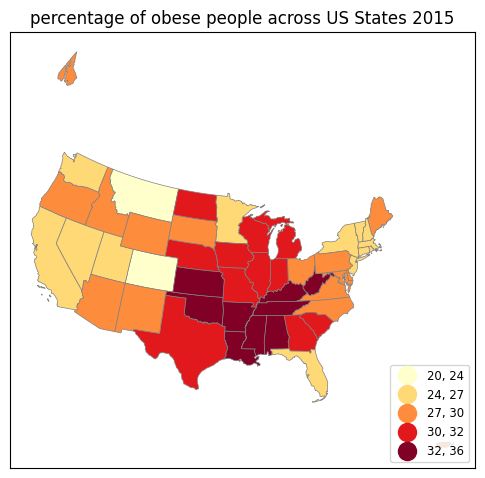

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
obs.plot(ax=ax,column='Obesity',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


# **PS 1** **Assignment**

In [8]:
! wget -q -O population_distribution_by_age_number_2015.csv "https://drive.google.com/uc?export=download&id=1UGWwj7_AY0FuCp04ICaqCNII-FYh_dlh"
population_density = pd.read_csv("population_distribution_by_age_number_2015.csv")
population_density

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,Footnotes
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0,1.0
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0,NaN
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0,NaN
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0,NaN
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0,NaN
...,...,...,...,...,...,...,...,...,...
64,KFF estimates based on the 2008-2021 American ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2 = population_density.drop(['Footnotes'],axis = 1)
df2

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0
...,...,...,...,...,...,...,...,...
64,KFF estimates based on the 2008-2021 American ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rows_to_drop = list(range(53,69))
df2 = df2.drop(rows_to_drop,axis = 0)


In [11]:
df2['percentage_us_population_per_state'] = (df2['Total'] / df2.loc[0,'Total']) * 100
df2['percentage_us_population_per_state'] = round(df2['percentage_us_population_per_state'],2)
df2

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,percentage_us_population_per_state
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0,100.00
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0,1.51
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0,0.23
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0,2.13
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0,0.92
5,California,9438000.0,3816900.0,5070900.0,10311100.0,4590600.0,5097700.0,38325100.0,12.25
6,Colorado,1301000.0,496000.0,723500.0,1421700.0,678500.0,694700.0,5315400.0,1.70
7,Connecticut,794900.0,304000.0,376100.0,966000.0,493400.0,543700.0,3478100.0,1.11
8,Delaware,211700.0,82200.0,105700.0,236900.0,126300.0,155500.0,918300.0,0.29
9,District of Columbia,120100.0,66300.0,134800.0,171400.0,70600.0,71600.0,634800.0,0.20


In [12]:
obs.rename(columns = {'NAME':'Location'},inplace=True)

In [13]:
merged_data = df2.merge(obs,on = 'Location',how='left')
merged_data['Obesity By Number'] = (merged_data['Total'] * merged_data['Obesity'])/100
merged_data['Obesity By Number'] = round(merged_data['Obesity By Number'],2)

In [14]:
merged_data[['Location','Total']]

,Location,Total
0,United States,312777900.0
1,Alabama,4730100.0
2,Alaska,707500.0
3,Arizona,6655100.0
4,Arkansas,2882300.0
5,California,38325100.0
6,Colorado,5315400.0
7,Connecticut,3478100.0
8,Delaware,918300.0
9,District of Columbia,634800.0


In [ ]:
merged_data['Obesity_per_state'] = round((merged_data['Obesity By Number'] * 100 / df2.loc[0,'Total']),2)
merged_data.describe()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,percentage_us_population_per_state,FID,Obesity,SHAPE_Leng,SHAPE_Area,Obesity By Number,Obesity_per_state
count,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,53.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000
mean,2.885836e+06,1.098958e+06,1.440511e+06,3.142577e+06,1.536694e+06,1.763334e+06,1.186791e+07,3.793962,26.500000,29.286538,6.294282e+06,1.724137e+12,1.754854e+06,0.560769
std,1.039015e+07,3.955786e+06,5.193199e+06,1.130903e+07,5.521108e+06,6.328178e+06,4.269083e+07,13.648920,15.154757,3.832832,3.068681e+06,1.455130e+12,1.894171e+06,0.606174
min,1.201000e+05,4.980000e+04,6.790000e+04,1.390000e+05,7.060000e+04,7.080000e+04,5.689000e+05,0.180000,1.000000,20.200000,0.000000e+00,0.000000e+00,1.402908e+05,0.040000
25%,4.462000e+05,1.543000e+05,1.863000e+05,4.579000e+05,2.364000e+05,2.679000e+05,1.791500e+06,0.570000,13.750000,26.250000,5.022132e+06,8.299946e+11,5.485730e+05,0.172500
50%,1.037500e+06,3.857000e+05,4.883000e+05,1.142800e+06,5.843000e+05,6.514000e+05,4.283400e+06,1.370000,26.500000,29.800000,6.445438e+06,1.492228e+12,1.235616e+06,0.395000
75%,1.672500e+06,6.343000e+05,9.125000e+05,1.857300e+06,9.254000e+05,1.105300e+06,7.002800e+06,2.240000,39.250000,31.475000,7.747383e+06,2.245753e+12,2.048671e+06,0.652500
max,7.608040e+07,2.895040e+07,3.799030e+07,8.282990e+07,4.050800e+07,4.641890e+07,3.127779e+08,100.000000,52.000000,36.200000,1.540832e+07,7.672329e+12,9.274674e+06,2.970000


In [ ]:
population = merged_data[['Children 0-18','Adults 19-25','Adults 26-34','Adults 35-54','Adults 55-64','65+','geometry','Location']]
population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']
del population['Adults 19-25']
del population['Adults 26-34']
del population['Adults 35-54']
del population['Adults 55-64']
population.dtypes

<ipython-input-100-b371281df9d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']


Children 0-18     float64
65+               float64
geometry         geometry
Location           object
Adults            float64
dtype: object

aok: what is pop dens??? and your top cat 9-76m does not appear on the map

<Axes: >

[]

[]

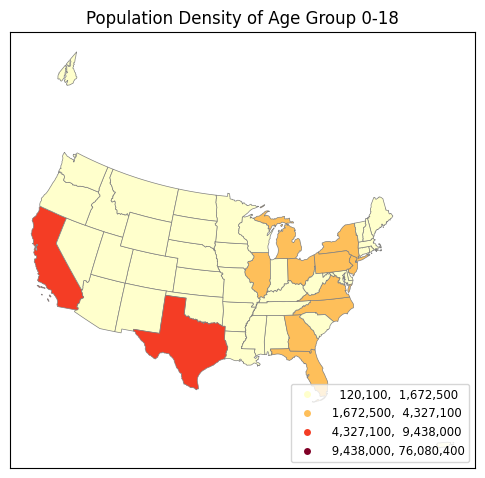

In [ ]:

gdp = gpd.GeoDataFrame(population,geometry = 'geometry')
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Children 0-18',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Density of Age Group 0-18")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

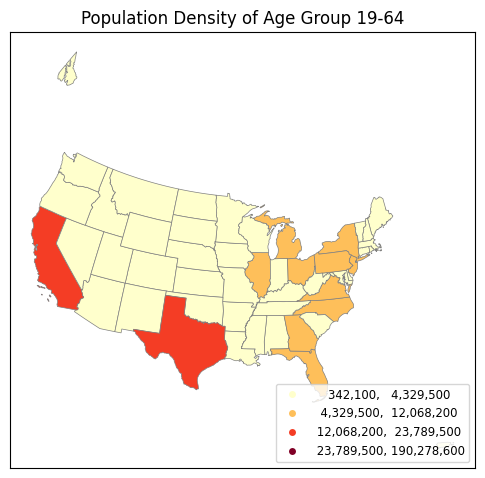

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Adults',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Density of Age Group 19-64")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

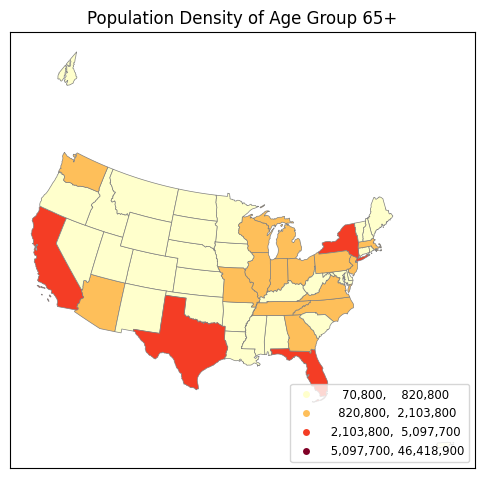

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='65+',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #

ax.title.set_text("Population Density of Age Group 65+")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
#df2 = df2.drop([0],axis = 0)
#df2

In [ ]:
gdf = gpd.GeoDataFrame(merged_data,geometry = 'geometry')

percentage of obese people across US States 2015 in comparison with total population of US--what is it? like 1st map was showing like 10-35perc, why here so different??? doesnt make sense

<Axes: >

[]

[]

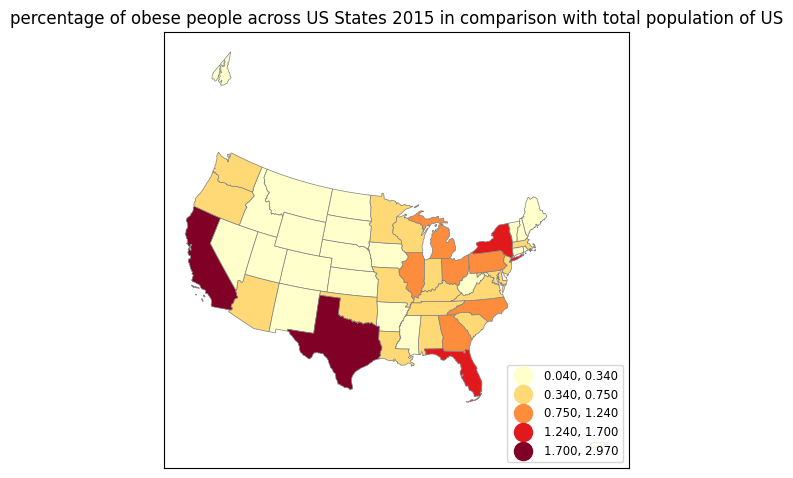

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Obesity_per_state',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.3f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015 in comparison with total population of US")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

<Axes: >

[]

[]

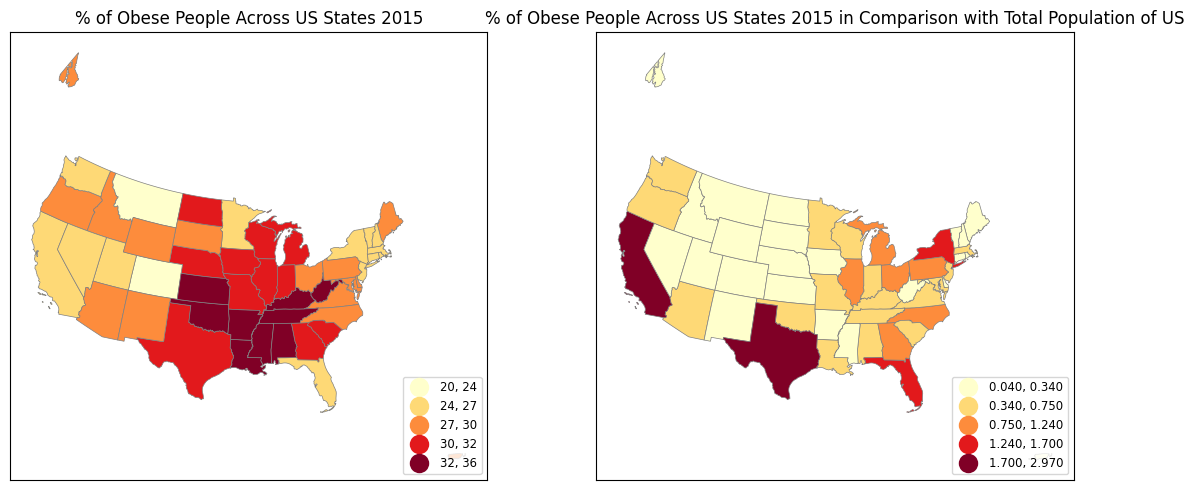

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first map on the first subplot (axes[0])
obs.plot(ax=axes[0], column='Obesity', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[0].title.set_text("% of Obese People Across US States 2015")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot the second map on the second subplot (axes[1])
gdf.plot(ax=axes[1], column='Obesity_per_state', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.3f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[1].title.set_text("% of Obese People Across US States 2015 in Comparison with Total Population of US")
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
merged = merged_data[merged_data['Location']!='United States']

<Axes: >

[]

[]

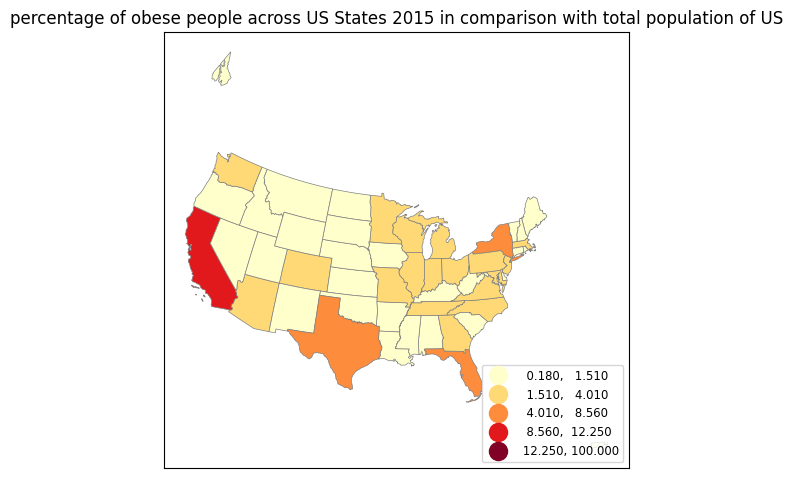

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='percentage_us_population_per_state',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.3f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015 in comparison with total population of US")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
merged.dtypes

Location                                object
Children 0-18                          float64
Adults 19-25                           float64
Adults 26-34                           float64
Adults 35-54                           float64
Adults 55-64                           float64
65+                                    float64
Total                                  float64
percentage_us_population_per_state     float64
FID                                    float64
Obesity                                float64
SHAPE_Leng                             float64
SHAPE_Area                             float64
geometry                              geometry
Obesity By Number                      float64
Obesity_per_state                      float64
dtype: object

<Axes: >

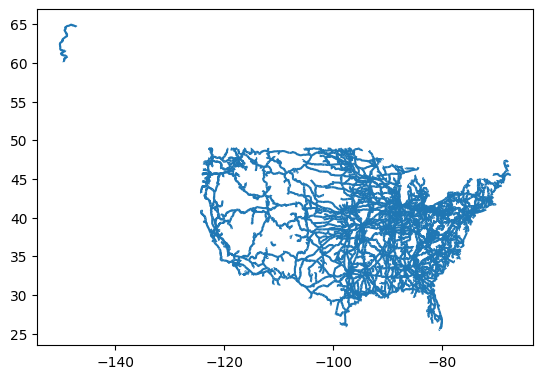

In [ ]:
#importing the Railway Line data
! wget -q -O rail.zip https://drive.google.com/uc?id=16CRtRAtzDh_rZk7IF9vCeUCTnkNA-B4Y&export=download

zip_ref = zipfile.ZipFile('rail.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
rail=gpd.read_file('railrdl010g.shp')
rail.plot()

In [ ]:
rail.dtypes

RAILRDL010     float64
RROWNER1        object
RROWNER2        object
RROWNER3        object
MARK1           object
MARK2           object
MARK3           object
MILES          float64
KILOMETERS     float64
geometry      geometry
dtype: object

<Axes: >

Text(0.5, 1.0, 'Obesity and Railroad Data Overlay')

[]

[]

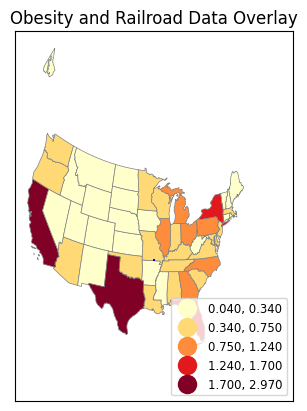

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Read the rail data
rail = gpd.read_file('railrdl010g.shp')

# Create a base map using gdf
ax = gdf.plot(column='Obesity_per_state', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
              edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.3f}",
              'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})

# Overlay the rail data on the same map
rail.plot(ax=ax, color='blue', linewidth=1.0)  # You can customize the color and other properties

# Set a title for the map
ax.set_title("Obesity and Railroad Data Overlay")

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the map
plt.show()
